In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
# importing fake news data
fake = pd.read_csv(r"/content/gdrive/My Drive/Fake.csv")

# Checking the first 10 rows
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
# importing true news data
true = pd.read_csv(r"/content/gdrive/My Drive/True.csv")

# Checking the first 10 rows
true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
# We dont have a Target or Label column to represent if the news is fake or True
# So we will create a column as Target in the true and fake data

fake["Target"] = "Fake"
true["Target"] = "True"

In [6]:
## Now let's look at the data once again
fake.sample(5)

,title,text,subject,date,Target
20673,MAN WALKS INTO TARGET With Undercover Camera…W...,Any company who puts the safety of myself and ...,left-news,"Apr 26, 2016",Fake
2559,The Internet Rips Trump Adviser’s Face Off Af...,Trump senior adviser Stephen Miller told ABC s...,News,"February 12, 2017",Fake
11950,WATCH SEAN HANNITY Destroy Obama’s Economic Po...,.@SeanHannity: The Obama Nightmare is finally...,politics,"Jan 10, 2017",Fake
8339,"Rick Santorum Endorses Rubio, But Can’t Actua...",It s pretty rare that a presidential candidate...,News,"February 4, 2016",Fake
4244,Republicans Say Trump MUST Stop Pushing This ...,The Republican civil war is heating up as memb...,News,"October 11, 2016",Fake


In [7]:
true.sample(5)

,title,text,subject,date,Target
1402,Trump denies Tillerson threatened to resign: T...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 5, 2017",True
19357,Romanian deputy PM Shhaideh investigated for a...,BUCHAREST (Reuters) - Romanian anti-corruption...,worldnews,"September 22, 2017",True
3351,Senate tax chief says scope for tax cuts still...,WASHINGTON (Reuters) - U.S. Senate Finance Com...,politicsNews,"June 7, 2017",True
6766,Mcconnell says Russian hacking investigations ...,WASHINGTON (Reuters) - U.S. Senate Republican ...,politicsNews,"December 12, 2016",True
1425,"Warren Buffett, Larry Fink criticize Trump tax...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"October 3, 2017",True


In [8]:
# let's look at the shape of both these dataframes
print('Fake Dataframe Shape:- ',fake.shape)
print('True Dataframe Shape:- ',true.shape)

# Fake news data is more than the true one

Fake Dataframe Shape:-  (23481, 5)
True Dataframe Shape:-  (21417, 5)


In [9]:
## Let's check the null values in both the dataframes

print('FAKE DATA:- ')
print(fake.isnull().sum())
print('\n')
print('TRUE DATA:- ')
print(true.isnull().sum())

# There are no null values in any of the dataframe

FAKE DATA:- 
title      0
text       0
subject    0
date       0
Target     0
dtype: int64


TRUE DATA:- 
title      0
text       0
subject    0
date       0
Target     0
dtype: int64


In [10]:
# Replace any empty strings with NaN
print('SHAPE BEFORE')
print('Fake df:- ',fake.shape)
print('True df:- ',true.shape)
for i in fake.columns:
    for j in true.columns:
        fake[i].replace(' ', np.nan, inplace=True)
        true[j].replace(' ', np.nan, inplace=True)
# Remove data with missing values for a complete dataset
fake.dropna(inplace=True)
true.dropna(inplace=True)  
print('\n')        
print('SHAPE AFTER')
print('Fake df:- ',fake.shape)
print('True df:- ',true.shape)

# We can see that all the empty data has been removed from both the dataframes

SHAPE BEFORE
Fake df:-  (23481, 5)
True df:-  (21417, 5)


SHAPE AFTER
Fake df:-  (22855, 5)
True df:-  (21416, 5)


In [11]:
# Add new column that will combine all columns to help determine fake and real news; this data will be used to train our model
fake['combined_text'] = fake['title'] + ' ' + fake['text']
true['combined_text'] = true['title'] + ' ' + true['text']

In [12]:
## Correcting the spelling mistakes if any
from textblob import TextBlob
for i in fake.columns:
    for j in true.columns:
        fb = TextBlob(i)
        tb = TextBlob(j)
        fb.correct()
        tb.correct()

In [13]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words('english')
# Find highest frequency words found in fake news
fake_news_words = []
for index, row in fake.iterrows():
    text = row['combined_text']

    # Convert to lower case
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)
    
    # Cleaning with regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    text_words = nltk.word_tokenize(text)
    
    # Remove stop words and add to list
    fake_news_words.extend([str(w) for w in text_words if not w in stop_words])
    
    
wcloud_fake_news_df = pd.DataFrame(fake_news_words, columns=['Words'])
wcloud_fake_news_df['Count'] = 1

wcloud_fake_news_df = wcloud_fake_news_df.groupby('Words')
wcloud_fake_news_df = wcloud_fake_news_df.agg({"Count": "sum"})

wcloud_fake_news = wcloud_fake_news_df.sort_values(by="Count", ascending=False)
    
    
# Find highest frequency words found in true/real news
real_news_words = []
for index, row in true.iterrows():
    text = row['combined_text']

    # Convert to lower case
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'[0-9]+', '', text)
    
    # Cleaning with regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    text_words = nltk.word_tokenize(text)
    
    # Remove stop words and add to list
    real_news_words.extend([str(w) for w in text_words if not w in stop_words])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Find highest frequency words found in fake and real news

# Adding list of words to dataframes
fake_news_words_df = pd.DataFrame(fake_news_words, columns=['Words'])
real_news_words_df = pd.DataFrame(real_news_words, columns=['Words'])

# Value count dataframes
fake_news_words_count = fake_news_words_df['Words'].value_counts().reset_index()
fake_news_words_count.columns = ['Words', 'Total Count']
fake_news_words_percent = fake_news_words_df['Words'].value_counts(normalize=True).reset_index().mul(100).round(1).astype(str) + '%'
fake_news_words_percent.columns = ['Words', 'Percentage']

real_news_words_count = real_news_words_df['Words'].value_counts().reset_index()
real_news_words_count.columns = ['Words', 'Total Count']
real_news_words_percent = real_news_words_df['Words'].value_counts(normalize=True).reset_index().mul(100).round(1).astype(str) + '%'
real_news_words_percent.columns = ['Words', 'Percentage']

# Word count summary tables
fake_news_words_summary_df = pd.DataFrame({"Words": fake_news_words_count['Words'],
                                           "Total Count": fake_news_words_count['Total Count'],
                                           "Percentage": fake_news_words_percent['Percentage']})
real_news_words_summary_df = pd.DataFrame({"Words": real_news_words_count['Words'],
                                           "Total Count": real_news_words_count['Total Count'],
                                           "Percentage": real_news_words_percent['Percentage']})

# Formatting
fake_news_words_summary_df['Total Count'] = fake_news_words_summary_df.apply(lambda x: "{:,}".format(x['Total Count']), axis=1)
real_news_words_summary_df['Total Count'] = real_news_words_summary_df.apply(lambda x: "{:,}".format(x['Total Count']), axis=1)

In [15]:
# Find highest frequency words found in ALL news
news_words = fake_news_words + real_news_words

# Adding list of words to dataframes
news_words_df = pd.DataFrame(news_words, columns=['Words'])

# Value count dataframes
news_words_count = news_words_df['Words'].value_counts().reset_index()
news_words_count.columns = ['Words', 'Total Count']
news_words_percent = news_words_df['Words'].value_counts(normalize=True).reset_index().mul(100).round(1).astype(str) + '%'
news_words_percent.columns = ['Words', 'Percentage']

# Word count summary tables
news_words_summary_df = pd.DataFrame({"Words": news_words_count['Words'],
                                      "Total Count": news_words_count['Total Count'],
                                      "Percentage": news_words_percent['Percentage']})

# Formatting
news_words_summary_df['Total Count'] = news_words_summary_df.apply(lambda x: "{:,}".format(x['Total Count']), axis=1)
news_words_summary_df.head(10)

,Words,Total Count,Percentage
0,said,"130,255",1.2%
1,trump,"128,304",1.2%
2,us,"68,254",0.6%
3,would,"55,423",0.5%
4,president,"52,639",0.5%
5,people,"41,637",0.4%
6,one,"36,283",0.3%
7,new,"32,700",0.3%
8,state,"32,326",0.3%
9,also,"31,231",0.3%


In [16]:
# Combine all words into one big string
wcloud_words = " ".join(word for word in news_words_summary_df['Words'])

In [17]:
# importing Image path and WordCloud modules
from PIL import Image
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

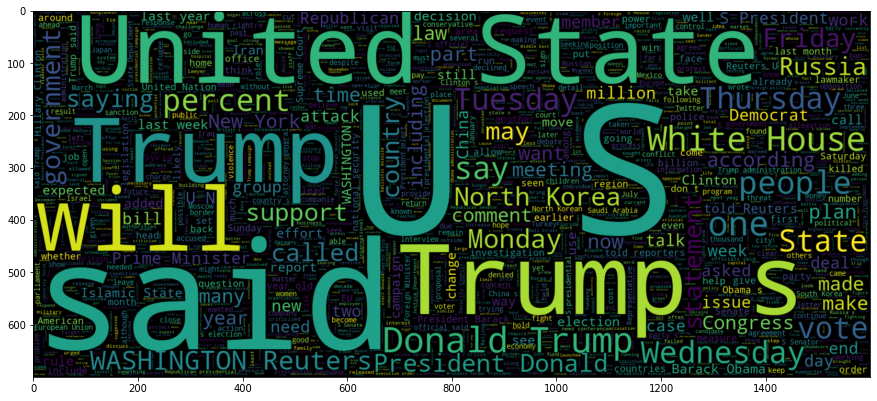

In [18]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(true[true.Target== 'True'].combined_text))
plt.imshow(wc, interpolation="bilinear")

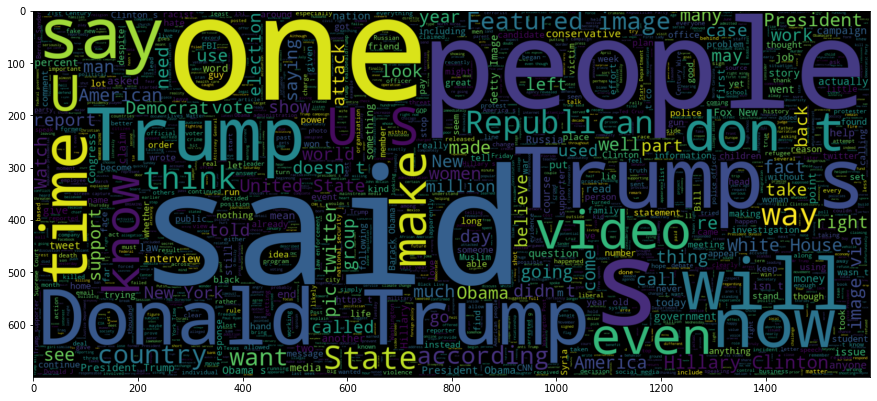

In [19]:
#word used in fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(fake[fake.Target== 'Fake'].combined_text))
plt.imshow(wc, interpolation="bilinear")

In [20]:
# Add count of fake and real news into summary dataframe
news_words_summary_df_merge1 = pd.merge(news_words_summary_df, fake_news_words_summary_df, on=['Words'])
news_words_summary_df_merge1.columns = ['Words', 'Total Count', 'Percentage', 'Count (Fake)', 'Percent (Fake)']
news_words_summary_df_merge2 = pd.merge(news_words_summary_df_merge1, real_news_words_summary_df, on=['Words'])
news_words_summary_df_merge2.columns = ['Words', 'Total Count', 'Percentage', 'Count (Fake)', 'Percent (Fake)', 'Count (Real)', 'Percent (Real)']

news_words_summary_df_merged = news_words_summary_df_merge2[['Words', 'Count (Fake)', 'Count (Real)', 'Total Count', 'Percentage']]
news_words_summary_df_merged = news_words_summary_df_merged.head(25)
news_words_summary_df_merged

,Words,Count (Fake),Count (Real),Total Count,Percentage
0,said,"31,202","99,053","130,255",1.2%
1,trump,"80,969","47,335","128,304",1.2%
2,us,"23,079","45,175","68,254",0.6%
3,would,"23,673","31,750","55,423",0.5%
4,president,"26,628","26,011","52,639",0.5%
5,people,"26,425","15,212","41,637",0.4%
6,one,"23,495","12,788","36,283",0.3%
7,new,"15,039","17,661","32,700",0.3%
8,state,"12,945","19,381","32,326",0.3%
9,also,"15,268","15,963","31,231",0.3%


In [21]:
# Set values for stacked bar chart
x = [news_words_summary_df_merged['Words'][1],
     news_words_summary_df_merged['Words'][4],
     news_words_summary_df_merged['Words'][10],
     news_words_summary_df_merged['Words'][11],
     news_words_summary_df_merged['Words'][12],
     news_words_summary_df_merged['Words'][14],
     news_words_summary_df_merged['Words'][15],
     news_words_summary_df_merged['Words'][16],
     news_words_summary_df_merged['Words'][17],
     news_words_summary_df_merged['Words'][23]]

y_fake = [int(news_words_summary_df_merged['Count (Fake)'][1].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][4].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][10].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][11].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][12].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][14].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][15].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][16].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][17].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Fake)'][23].replace(',' , ''))]

y_real = [int(news_words_summary_df_merged['Count (Real)'][1].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][4].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][10].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][11].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][12].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][14].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][15].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][16].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][17].replace(',' , '')),
          int(news_words_summary_df_merged['Count (Real)'][23].replace(',' , ''))]

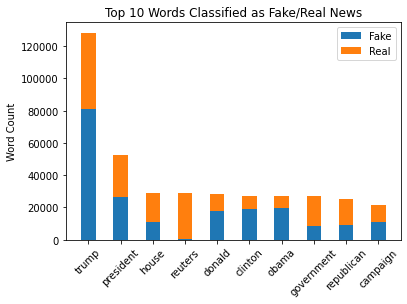

<Figure size 4320x2160 with 0 Axes>

In [22]:
# Plot stacked bar chart showing the top 10 words which are classified as either real or fake
fig, ax = plt.subplots()
plt.figure(figsize=(60,30))

ax.bar(x, y_fake, 0.45, label='Fake')
ax.bar(x, y_real, 0.45, bottom=y_fake, label='Real')

ax.set_xticklabels(x, rotation = 45)
ax.set_ylabel('Word Count')
ax.set_title('Top 10 Words Classified as Fake/Real News')
ax.legend()

plt.subplots_adjust(left=0.15, bottom=0.22)
plt.savefig('stacked')
plt.show()

In [23]:
## encoding the target
fake.Target[fake.Target == 'Fake'] = 0
true.Target[true.Target == 'True'] = 1

In [24]:
## combining both the dataframes
# Concatenate dataframes
news_df = pd.concat([fake,true]).reset_index(drop = True)
news_df.shape


(44271, 6)

In [25]:
# Shuffle the data
from sklearn.utils import shuffle
news_df = shuffle(news_df)
news_df = news_df.reset_index(drop=True)

In [26]:
## checking the data 
news_df.head()

,title,text,subject,date,Target,combined_text
0,Bare-breasted FEMEN activist grabs Trump statu...,MADRID (Reuters) - A topless activist from the...,politicsNews,"January 17, 2017",1,Bare-breasted FEMEN activist grabs Trump statu...
1,Hypocrite Ivanka Gets SKEWERED For Approving ...,Ivanka Trump just proved that she doesn t supp...,News,"August 30, 2017",0,Hypocrite Ivanka Gets SKEWERED For Approving ...
2,WATCH: Ted Cruz Gets His A** Handed To Him By...,Chuck Todd took Ted Cruz to the woodshed on Su...,News,"May 1, 2016",0,WATCH: Ted Cruz Gets His A** Handed To Him By...
3,BREAKING: FEDERAL COURT RULES ON NSA’S WARRANT...,Another positive step towards restoring our fr...,Government News,"May 7, 2015",0,BREAKING: FEDERAL COURT RULES ON NSA’S WARRANT...
4,HILLARY CLINTON SINGS “Song for Women” In Came...,The Daily Show thought it was appropriate in t...,politics,"Dec 19, 2017",0,HILLARY CLINTON SINGS “Song for Women” In Came...


In [27]:
## we can drop some of these columns which are not needed
## we are dropping text because we have already created the combined text column
news_df.drop(['title','text'],axis=1,inplace=True)
news_df.sample()

,subject,date,Target,combined_text
1966,worldnews,"December 8, 2017",1,"After stinging Athens, Turkey's Erdogan woos c..."


In [28]:
## let's change the date to date datatype
news_df.dtypes

subject          object
date             object
Target           object
combined_text    object
dtype: object

In [29]:
## let's drop the dat column
news_df.drop(['date'],axis=1,inplace=True)
news_df.sample()

,subject,Target,combined_text
32391,left-news,0,UNITED AIRLINES KICKS TODDLER Out Of $969 Seat...


In [30]:
# Cleaning dataframe 'topics' column
news_topic_df = news_df
news_topic_df.loc[news_topic_df['subject'] == "News", 'subject'] = 'U.S. News'
news_topic_df.loc[news_topic_df['subject'] == "US_News", 'subject'] = 'U.S. News'
news_topic_df.loc[news_topic_df['subject'] == "politics", 'subject'] = 'Politics'
news_topic_df.loc[news_topic_df['subject'] == "politicsNews", 'subject'] = 'Politics'
news_topic_df.loc[news_topic_df['subject'] == "left-news", 'subject'] = 'Politics'
news_topic_df.loc[news_topic_df['subject'] == "Middle-east", 'subject'] = 'World News'
news_topic_df.loc[news_topic_df['subject'] == "worldnews", 'subject'] = 'World News'
news_topic_df.loc[news_topic_df['subject'] == "Government News", 'subject'] = 'Politics'

# Value counts dataframe
topics_count = news_topic_df['subject'].value_counts().reset_index()
topics_count.columns = ['Subject', 'Total Count']

# Topic count summary tables
topic_summary_df = pd.DataFrame({"Subject": topics_count['Subject'],
                                 "Total Count": topics_count['Total Count']})

topic_summary_df

,Subject,Total Count
0,Politics,23515
1,World News,10923
2,U.S. News,9833


In [31]:
news_df['combined_text'] = news_df['combined_text'].apply(lambda x: x.lower())
news_df['subject'] = news_df['subject'].apply(lambda y: y.lower())
news_df.sample(2)

,subject,Target,combined_text
35397,u.s. news,0,viral video of ‘liberal redneck’ hilariously ...
29397,world news,1,zimbabwe military says engaging mugabe on the ...


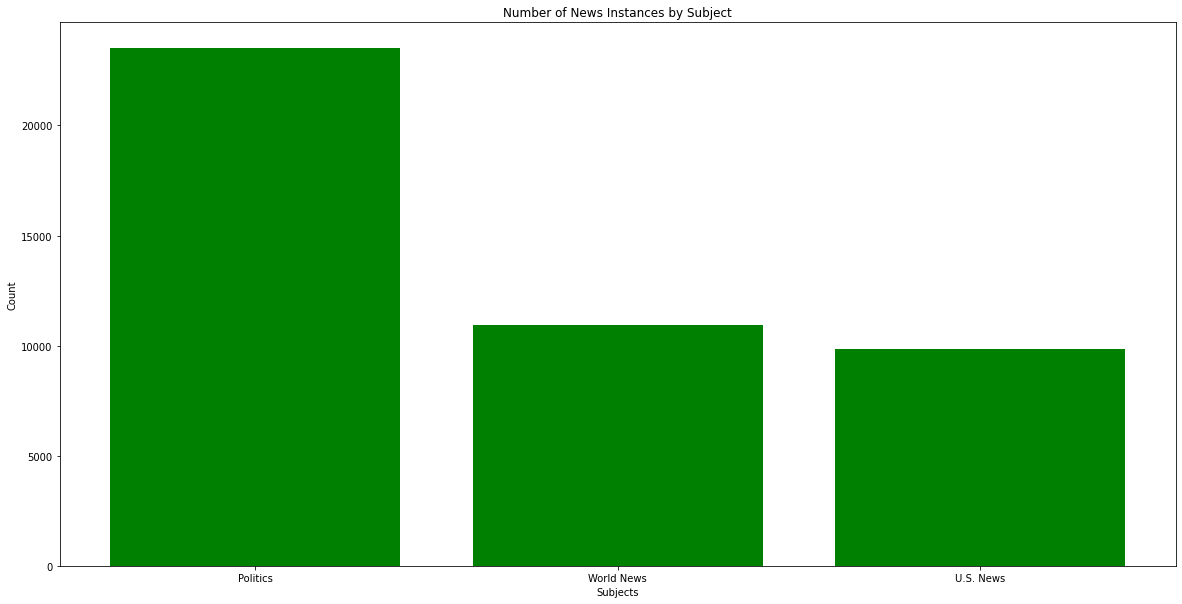

In [32]:
# Plot bar graph
x_pos = [i for i, _ in enumerate(topic_summary_df['Subject'])]
plt.figure(figsize=(20,10))
plt.bar(x_pos, topic_summary_df['Total Count'], color='green')
plt.xlabel("Subjects")
plt.ylabel("Count")
plt.title("Number of News Instances by Subject")

plt.xticks(x_pos, topic_summary_df['Subject'])
plt.savefig("Subjects")
plt.show()

# News related to Politics is double that of the WorldNews subjects and US news

MODEL BUILDING

In [33]:
## we have to first convert the target into integer type
news_topic_df['Target'] = news_topic_df['Target'].astype('int')

In [34]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
# Splitting data into test and train datasets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(news_topic_df['combined_text'],news_topic_df.Target, test_size=0.2, random_state=42)

Logistic Regression

In [36]:
## creating a dictionary to store the models and their accuracy scores in respective columns
dct = dict()

In [51]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
mnb = MultinomialNB()
lr = LogisticRegression()

In [37]:
# importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.04%


Confusion matrix, without normalization


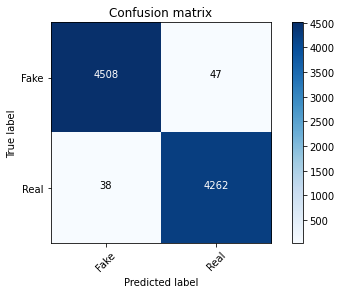

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.01%


Confusion matrix, without normalization


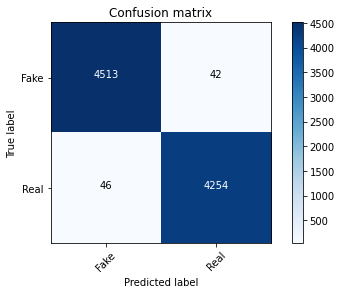

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.7%


Confusion matrix, without normalization


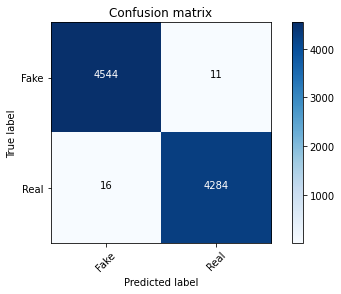

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

NaiveBayes

In [43]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.86%


Confusion matrix, without normalization


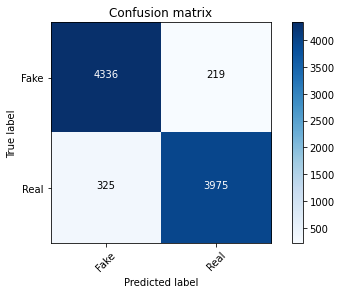

In [44]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Comparing the accuracy scores of these models

([<matplotlib.axis.YTick at 0x7fba0b8a4b50>,
 <a list of 10 Text major ticklabel objects>)

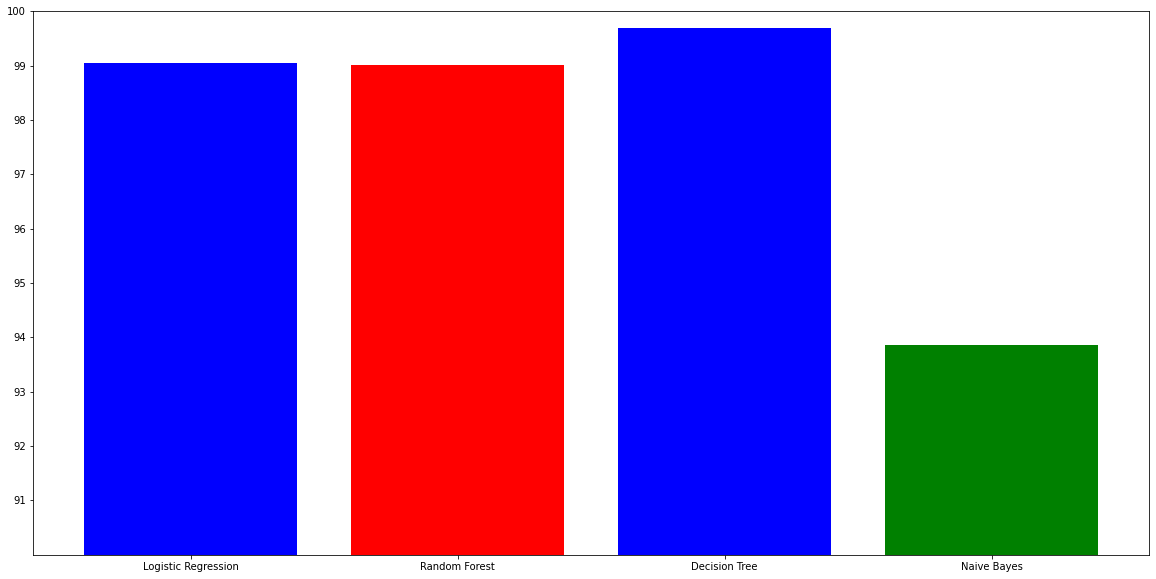

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(list(dct.keys()),list(dct.values()),color='BrBG')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

SAVING THE MODEL

In [52]:
# since decision tree is giving high accuracy we will save it as our best model
import pickle
filename = 'fake_news.prd'
pickle.dump(dtc,open(filename, 'wb'))

---------------------------------------------------------------------                  THE END ---------------------------------------------------------------------